# UK Population

# The notebook contains the entire code, that has been documented and a selection of some graphs are shown. The other graphs can be seen by uncommenting some lines (they have been pointed out)
# Please note that the conclusions are kept brief and are included within this notebook. To make things clearer, the graphs that are printed in the notebook have been attached before each conclusion

In [1]:
%load_ext jupyternotify
%autonotify -a 60

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import jsonstat
import sys

from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# The DF ('df') must be loaded 
# Function that takes as input (for region value): 'Wales', 'Scotland', 'Northern Ireland' or 'England and Wales' (X)

def region_of_interest(region):
    region = df[(df['geography'] == region) & (df['sex'] == 'Total') & (df['measures'] == 'Value')]

    # Two possible approaches can be used to make a comparison when it comes to the age range as there are missing values for some of them. 
    # In order to get a complete picture, the records that will be compared are from the original age ranges that have been used. This means all records from 1981-2017 can be compared. If the updated age ranges were to
    # be compared, then the years would have had to be dropped

    # Create new DF that does not include specific rows; i.e. rows with certain features (as can be seen below in the code)
    region = region[(region['age'] != 'All ages') & (region['age'] !=  'Aged 0 - 15') & (region['age'] !=  'Aged 16 - 64') & (region['age'] !=  'Aged 18 - 24') \
                                    & (region['age'] !=  'Aged 16 - 59/64') & (region['age'] != 'Aged 65 and over')]    
    
    # Get the age ranges and split them into 4 groups
    age_range = df['age'].unique()[1:20]
    youth = list(age_range[:4])
    young_adults = list(age_range[4:7])
    middle_age = list(age_range[7:13])
    old_age = list(age_range[13:])    
    
    # Separate out age groups into four categories
    region_youth = region.loc[region['age'].isin(youth)] # Ages 0-14; 4 age groups
    region_young = region.loc[region['age'].isin(young_adults)] # Ages 15-29; 3 age groups
    region_middle = region.loc[region['age'].isin(middle_age)] #30-59; 6 age groups
    region_old = region.loc[region['age'].isin(old_age)] # Ages 60 and over; 6 age groups
    
    # Create a new column and label the age ranges accordingly
    region['age_group'] = ['Youth' if x in youth else x for x in region['age']]
    region['age_group'] = ['Young_Adults' if x in young_adults else x for x in region['age_group']]
    region['age_group'] = ['Middle_Age' if x in middle_age else x for x in region['age_group']]
    region['age_group'] = ['Old_Age' if x in old_age else x for x in region['age_group']]
    

    # Display age range for region and their value for each year
    return region, region_youth, region_young, region_middle, region_old # region should be named the same as the input X (see 2nd line comment) to make life simpler

In [4]:
# The input should be from region_of_interest. I.e. df_ = region ... it cannot work for any other DF
# This function will show how each age group (youth ...) in the region behaves overall 

def plot_ageGroup(df_, title_name = 'Graph'):
    if title_name == 'Graph':
        title_name = df_['geography'].iloc[0]
        
    # Set figure size
    sns.set(rc = {'figure.figsize':(12,8)})

    # Use seaborn to pointplot the information in the DF above.
    # Please note, mean() does not do anything as there are single values for each age group. Functions such as count() and sum() would give the exact same answer
    
    plot = sns.pointplot(data = df_.groupby(['age_group', 'date']).mean().reset_index(), 
                  x='date', y='Value', hue='age_group', legend_out = False, palette = colours)

    # Move legend out of the plot. 
    # Rotate the x-axis labels so the years are easy to read
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(title_name, fontsize = 16)
    plt.xlabel('Year', fontsize = 14)
    plt.ylabel('Population', fontsize = 14)
    plt.show()

In [5]:
# The input should be from region_of_interest. I.e. df_ = region_tot_val, youth_depth etc...
# This function will show all age groups over the years that the data is valid for
# The function allows the person to see in more detail what is happening within specific age ranges

def plot_region(df_, title_name = 'Graph'):
    if title_name == 'Graph':
        title_name = df_['geography'].iloc[0]
        
    # Set figure size
    sns.set(rc = {'figure.figsize':(12,8)})

    # Use seaborn to pointplot the information in the DF above.
    # Please note, mean() does not do anything as there are single values for each age group. Functions such as count() and sum() would give the exact same answer
    plot = sns.pointplot(data = df_.groupby(['age', 'date']).mean().reset_index(), 
                  x='date', y='Value', hue='age', legend_out = False, palette = colours)

    # Move legend out of the plot. 
    # Rotate the x-axis labels so the years are easy to read
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(title_name, fontsize = 16)
    plt.xlabel('Year', fontsize = 14)
    plt.ylabel('Population', fontsize = 14)
    plt.show()

In [6]:
# Custom colour scheme

colours = [
    '#000000', # black
    '#FF0000', # red
    '#003366', # navy blue
    '#FFFF00', # yellow
    '#e75480', # dark pink
    '#006400', # dark green
    '#00FF00', # lime
    '#D4AF37', # metallic gold
    '#C0C0C0', # silver
    '#360b49', # dark purple
    '#9b173e', # maroon
    '#00bfff', # sky blue
    '#fd5e53', # sunrise
    '#808080', # gray
    '#EE82EE', # violet
    '#FFA500', # orange
    '#228B22', # light green
    '#9ACD32', # blue
    '#b7b386', # ??
]

In [7]:
# set path where data can be saved for later use if needed
# path = sys.argv[0]
path = '/Users/adil/Documents/Additional Work/ukpopulation/'

###### https://pypi.org/project/jsonstat.py/

In [8]:
# url of jsonstat data
url = 'https://www.nomisweb.co.uk/api/v01/dataset/NM_31_1.jsonstat.json'
collection = jsonstat.from_url(url)

# print list of dataset contained into the collection
print(collection)

# print description about each dimension of the dataset
for details in collection.dimensions():
    print(details)

name:   'Population estimates - local authority based by five year age band'
label:  'Population estimates - local authority based by five year age band'
size: 22200
+-----+-----------+-----------+------+--------+
| pos | id        | label     | size | role   |
+-----+-----------+-----------+------+--------+
| 0   | time      | date      | 37   | time   |
| 1   | geography | geography | 4    | geo    |
| 2   | sex       | sex       | 3    |        |
| 3   | age       | age       | 25   |        |
| 4   | measures  | measures  | 2    | metric |
+-----+-----------+-----------+------+--------+
+-----+--------+--------+
| pos | idx    | label  |
+-----+--------+--------+
| 0   | '1981' | '1981' |
| 1   | '1982' | '1982' |
| 2   | '1983' | '1983' |
| 3   | '1984' | '1984' |
| 4   | '1985' | '1985' |
| 5   | '1986' | '1986' |
| 6   | '1987' | '1987' |
| 7   | '1988' | '1988' |
| 8   | '1989' | '1989' |
| 9   | '1990' | '1990' |
| 10  | '1991' | '1991' |
| 11  | '1992' | '1992' |
| 12  | '199

# Create DF. Table showing male and female population across all age groups and ranges and their values or percentages for every year

##### NOTE: The df below MUST be loaded for the functions to work

In [9]:
df = collection.to_data_frame('date')
df = df.reset_index()
print(' Number of records in the data:', df.shape[0], '\n', 'Total features:', df.shape[1])
df.head()

 Number of records in the data: 22200 
 Total features: 6


,date,geography,sex,age,measures,Value
0,1981,Wales,Male,All ages,Value,1365100.0
1,1981,Wales,Male,All ages,Percent,100.0
2,1981,Wales,Male,Aged under 1 year,Value,18300.0
3,1981,Wales,Male,Aged under 1 year,Percent,1.3
4,1981,Wales,Male,Aged 1 - 4 years,Value,70200.0


# 1. DF with latest year (2017)

In [10]:
df_lYear = df[df['date'] == df['date'].max()]
print(' Number of records in the data:', df_lYear.shape[0], '\n', 'Total features:', df_lYear.shape[1])
df_lYear.head()

 Number of records in the data: 600 
 Total features: 6


,date,geography,sex,age,measures,Value
21600,2017,Wales,Male,All ages,Value,1540200.0
21601,2017,Wales,Male,All ages,Percent,100.0
21602,2017,Wales,Male,Aged under 1 year,Value,16500.0
21603,2017,Wales,Male,Aged under 1 year,Percent,1.1
21604,2017,Wales,Male,Aged 1 - 4 years,Value,70800.0


###### Only consider measures that are 'Value'
###### Convert the Value metric to an integer

In [11]:
df_lYear = df_lYear[df_lYear['measures'] == 'Value']
df_lYear['Value'] = df_lYear['Value'].astype(int) 
print(' Number of records in the data:', df_lYear.shape[0], '\n', 'Total features:', df_lYear.shape[1])
df_lYear.head()

 Number of records in the data: 300 
 Total features: 6


,date,geography,sex,age,measures,Value
21600,2017,Wales,Male,All ages,Value,1540200
21602,2017,Wales,Male,Aged under 1 year,Value,16500
21604,2017,Wales,Male,Aged 1 - 4 years,Value,70800
21606,2017,Wales,Male,Aged 5 - 9 years,Value,94600
21608,2017,Wales,Male,Aged 10 - 14 years,Value,87700


###### Only interested in totals and not in several age ranges. Hence, need to get appropriate records

In [12]:
df_total_pop = df_lYear[df_lYear['age'] == 'All ages']
print(' Number of records in the data:', df_total_pop.shape[0], '\n', 'Total features:', df_total_pop.shape[1])
df_total_pop

 Number of records in the data: 12 
 Total features: 6


,date,geography,sex,age,measures,Value
21600,2017,Wales,Male,All ages,Value,1540200
21650,2017,Wales,Female,All ages,Value,1585000
21700,2017,Wales,Total,All ages,Value,3125200
21750,2017,Scotland,Male,All ages,Value,2640300
21800,2017,Scotland,Female,All ages,Value,2784500
21850,2017,Scotland,Total,All ages,Value,5424800
21900,2017,Northern Ireland,Male,All ages,Value,920200
21950,2017,Northern Ireland,Female,All ages,Value,950600
22000,2017,Northern Ireland,Total,All ages,Value,1870800
22050,2017,England and Wales,Male,All ages,Value,29021300


#### According to the brief: A table showing the male, female and total population in columns, per UK region in rows, as well as the UK total

In [13]:
df_total_pop = df_total_pop.pivot_table('Value', ['date', 'geography'], 'sex')
df_total_pop = df_total_pop.reset_index()
df_total_pop

sex,date,geography,Female,Male,Total
0,2017,England and Wales,29723300,29021300,58744600
1,2017,Northern Ireland,950600,920200,1870800
2,2017,Scotland,2784500,2640300,5424800
3,2017,Wales,1585000,1540200,3125200


###### Add all numeric columns

In [14]:
femalesum = df_total_pop['Female'].sum() # total females
malesum = df_total_pop['Male'].sum() # total males
total = df_total_pop['Total'].sum() # total population

# Add the above information to the table above
df_total_pop = df_total_pop.append({'date': 2017, 'geography': 'United Kingdom (Total)', 'Female': femalesum, 'Male': malesum, 'Total': total}, ignore_index = True)
df_total_pop

sex,date,geography,Female,Male,Total
0,2017,England and Wales,29723300,29021300,58744600
1,2017,Northern Ireland,950600,920200,1870800
2,2017,Scotland,2784500,2640300,5424800
3,2017,Wales,1585000,1540200,3125200
4,2017,United Kingdom (Total),35043400,34122000,69165400


# 2. How the population progressed by geography and age range over the years

### Extract information from all 4 region using the function region_of_interest()

In [15]:
wales, wales_youth, wales_young, wales_middle, wales_old = region_of_interest('Wales')
scotland, scot_youth, scot_young, scot_middle, scot_old = region_of_interest('Scotland')
nire, nire_youth, nire_young, nire_middle, nire_old = region_of_interest('Northern Ireland')
engWal, engWal_youth, engWal_young, engWal_middle, engWal_old = region_of_interest('England and Wales')

### Plot graphs using plot_region() and plot_ageGroup()

### 2.1 Wales

###### Plot all age ranges over the years

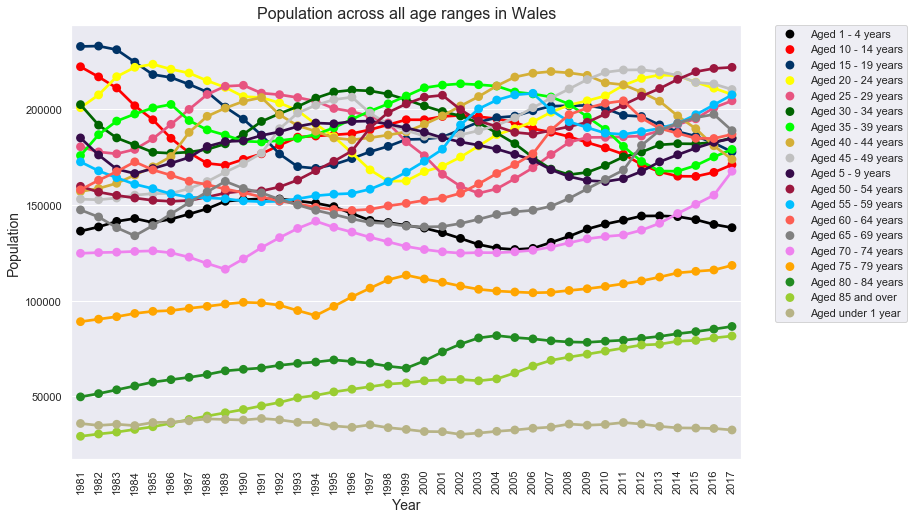

In [16]:
plot_region(wales, 'Population across all age ranges in Wales')

###### Plot age groups over the years

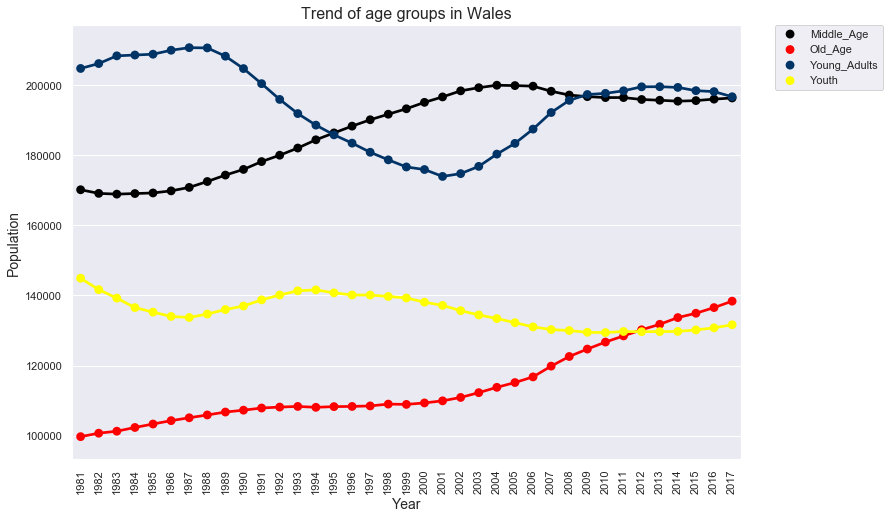

In [17]:
plot_ageGroup(wales, 'Trend of age groups in Wales')

###### Uncomment to see other graphs

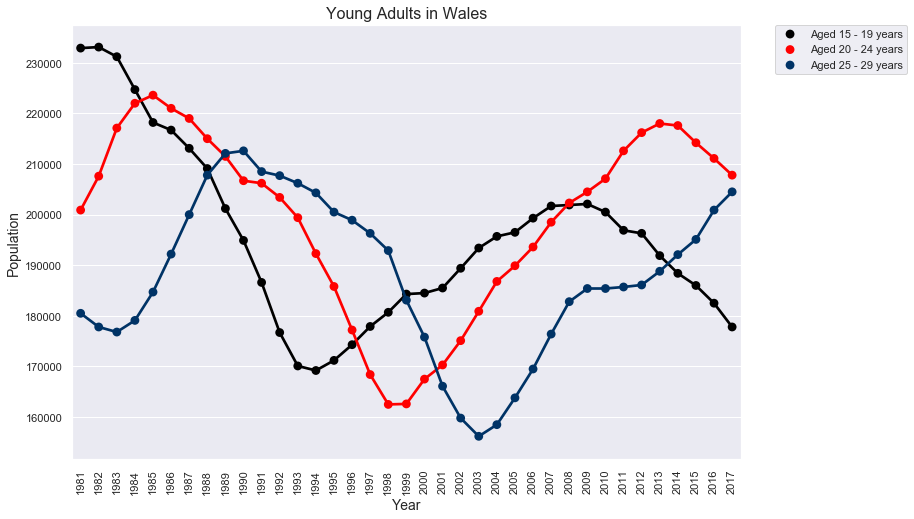

In [18]:
# plot_region(wales_youth, 'Youths in Wales')
plot_region(wales_young, 'Young Adults in Wales')
# plot_region(wales_middle, 'Wales Middle')
# plot_region(wales_old, 'Old Wales')

### 2.2 Scotland

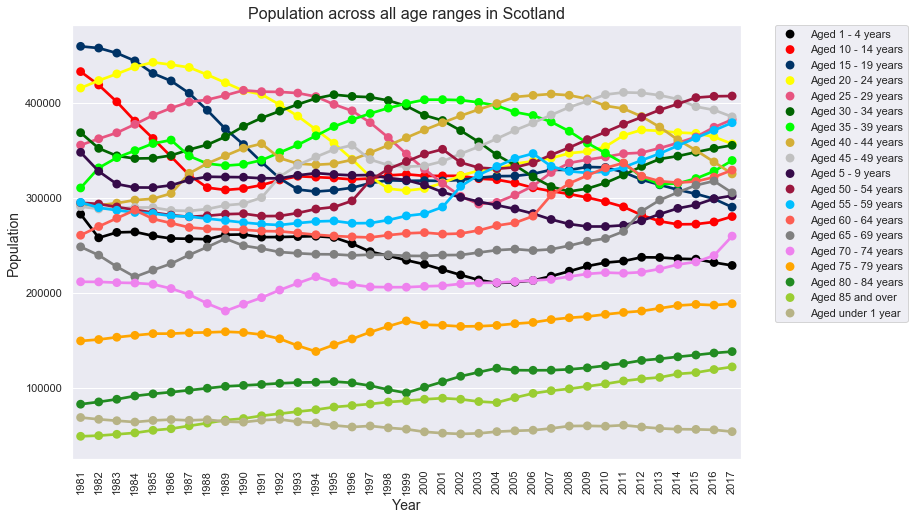

In [19]:
plot_region(scotland, 'Population across all age ranges in Scotland')

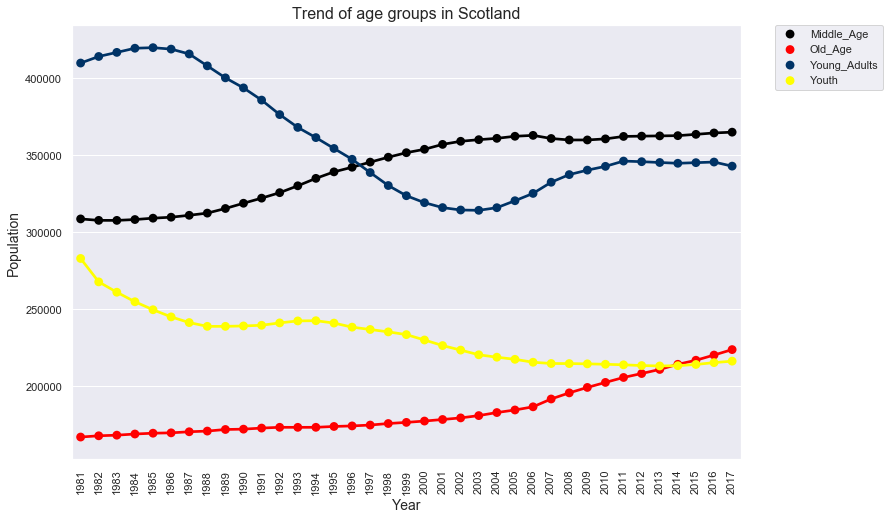

In [20]:
plot_ageGroup(scotland, 'Trend of age groups in Scotland')

###### Uncomment to see other graphs

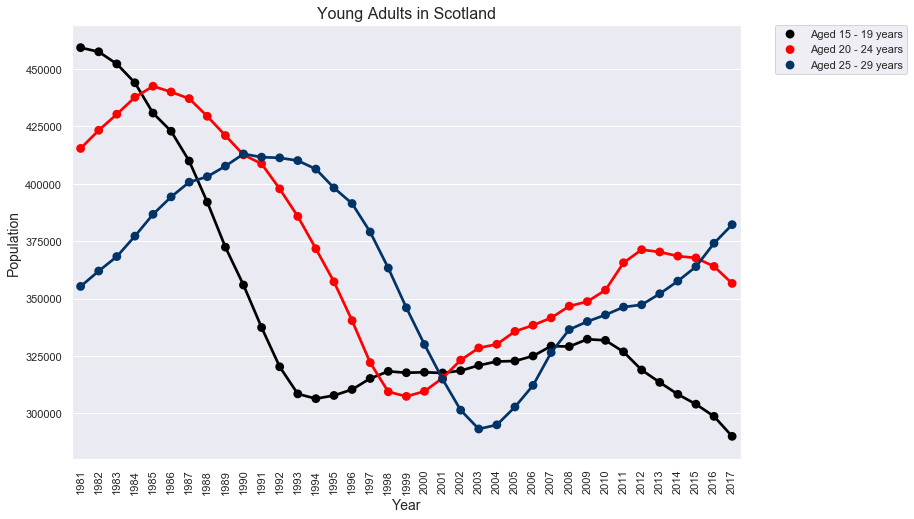

In [21]:
# plot_region(scot_youth, 'Scotland Youth')
plot_region(scot_young, 'Young Adults in Scotland')
# plot_region(scot_middle, 'Scotland Middle')
# plot_region(scot_old, 'Scotland Old')

### 2.3 Northern Ireland

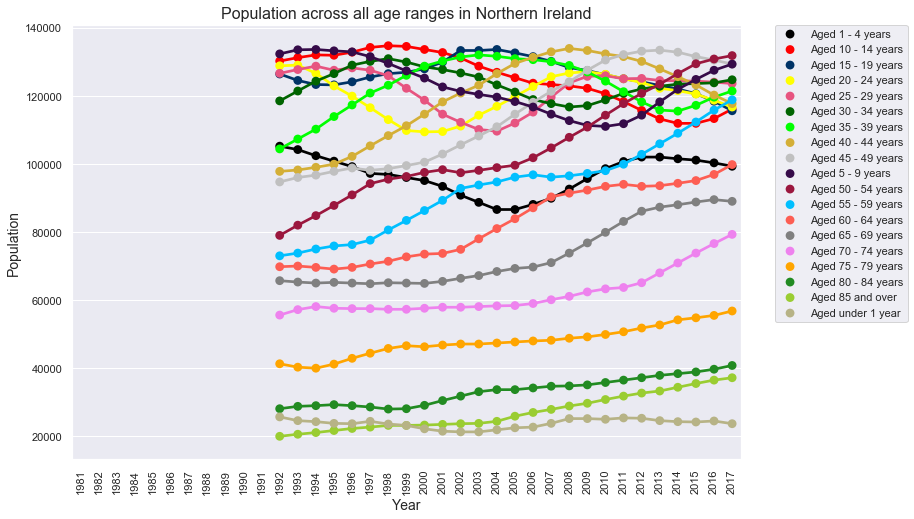

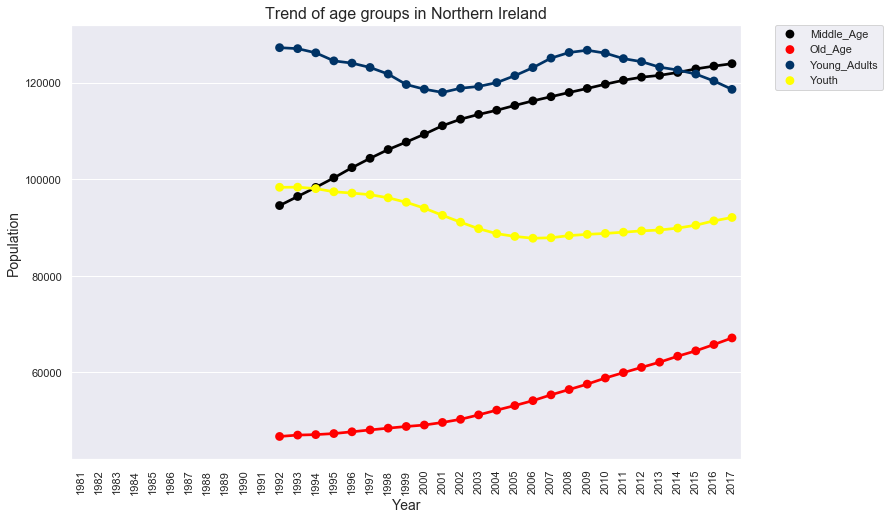

In [22]:
plot_region(nire, 'Population across all age ranges in Northern Ireland')
plot_ageGroup(nire, 'Trend of age groups in Northern Ireland')

###### Uncomment to see other graphs

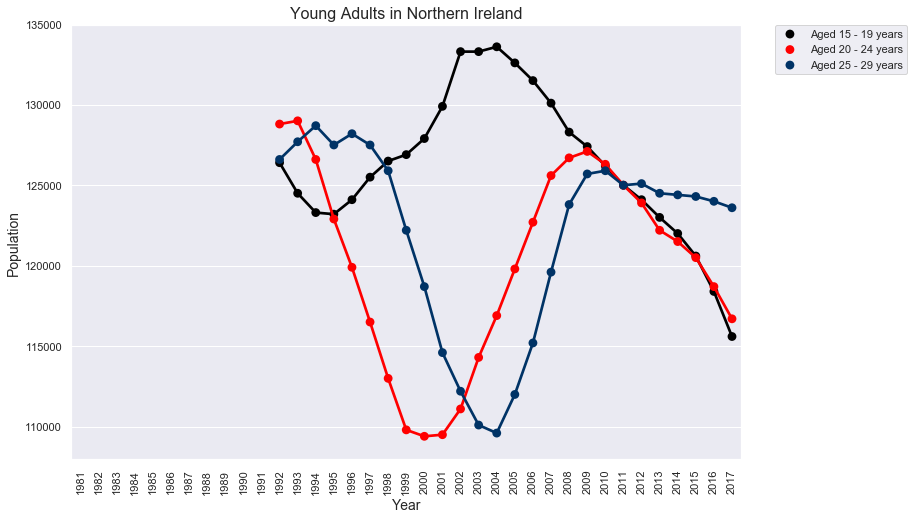

In [23]:
# plot_region(nire_youth, 'NI Youth')
plot_region(nire_young, 'Young Adults in Northern Ireland')
# plot_region(nire_middle, 'NI Middle')
# plot_region(nire_old, 'NI Old')

### 2.4 England and Wales

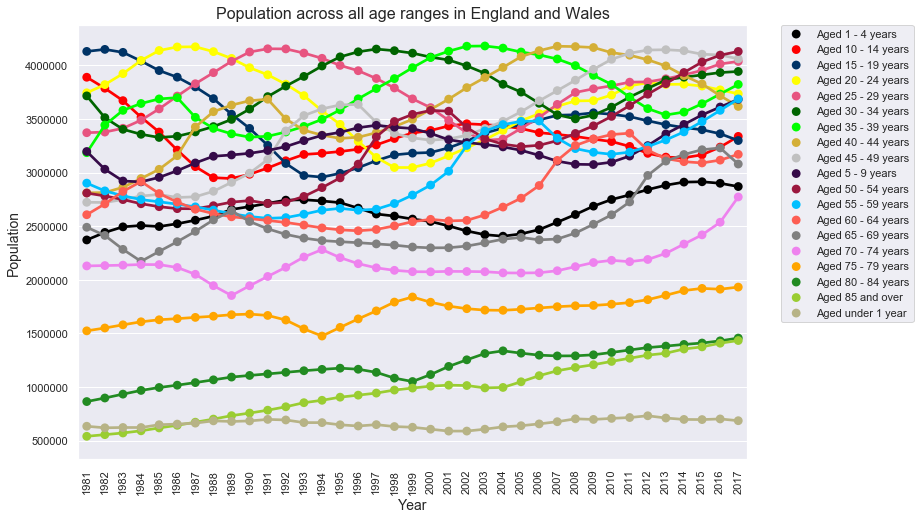

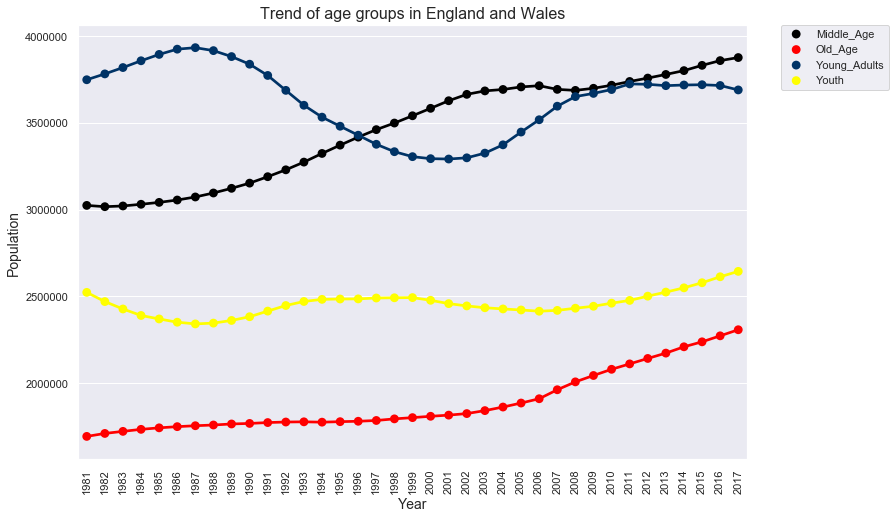

In [24]:
plot_region(engWal, 'Population across all age ranges in England and Wales')
plot_ageGroup(engWal, 'Trend of age groups in England and Wales')

###### Uncomment to see other graphs

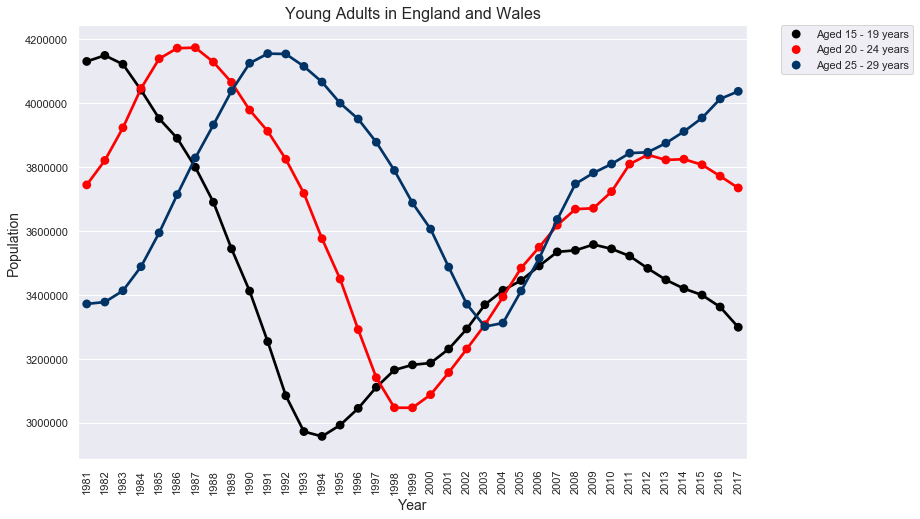

In [25]:
# plot_region(engWal_youth, 'Youth')
plot_region(engWal_young, 'Young Adults in England and Wales')
# plot_region(engWal_middle, 'Middle')
# plot_region(engWal_old, 'Old')

# 2.5 Analysis on the above graphs

##### The graphs that have been printed above are the ones that will be talked about. 

##### Trend graphs (from above):

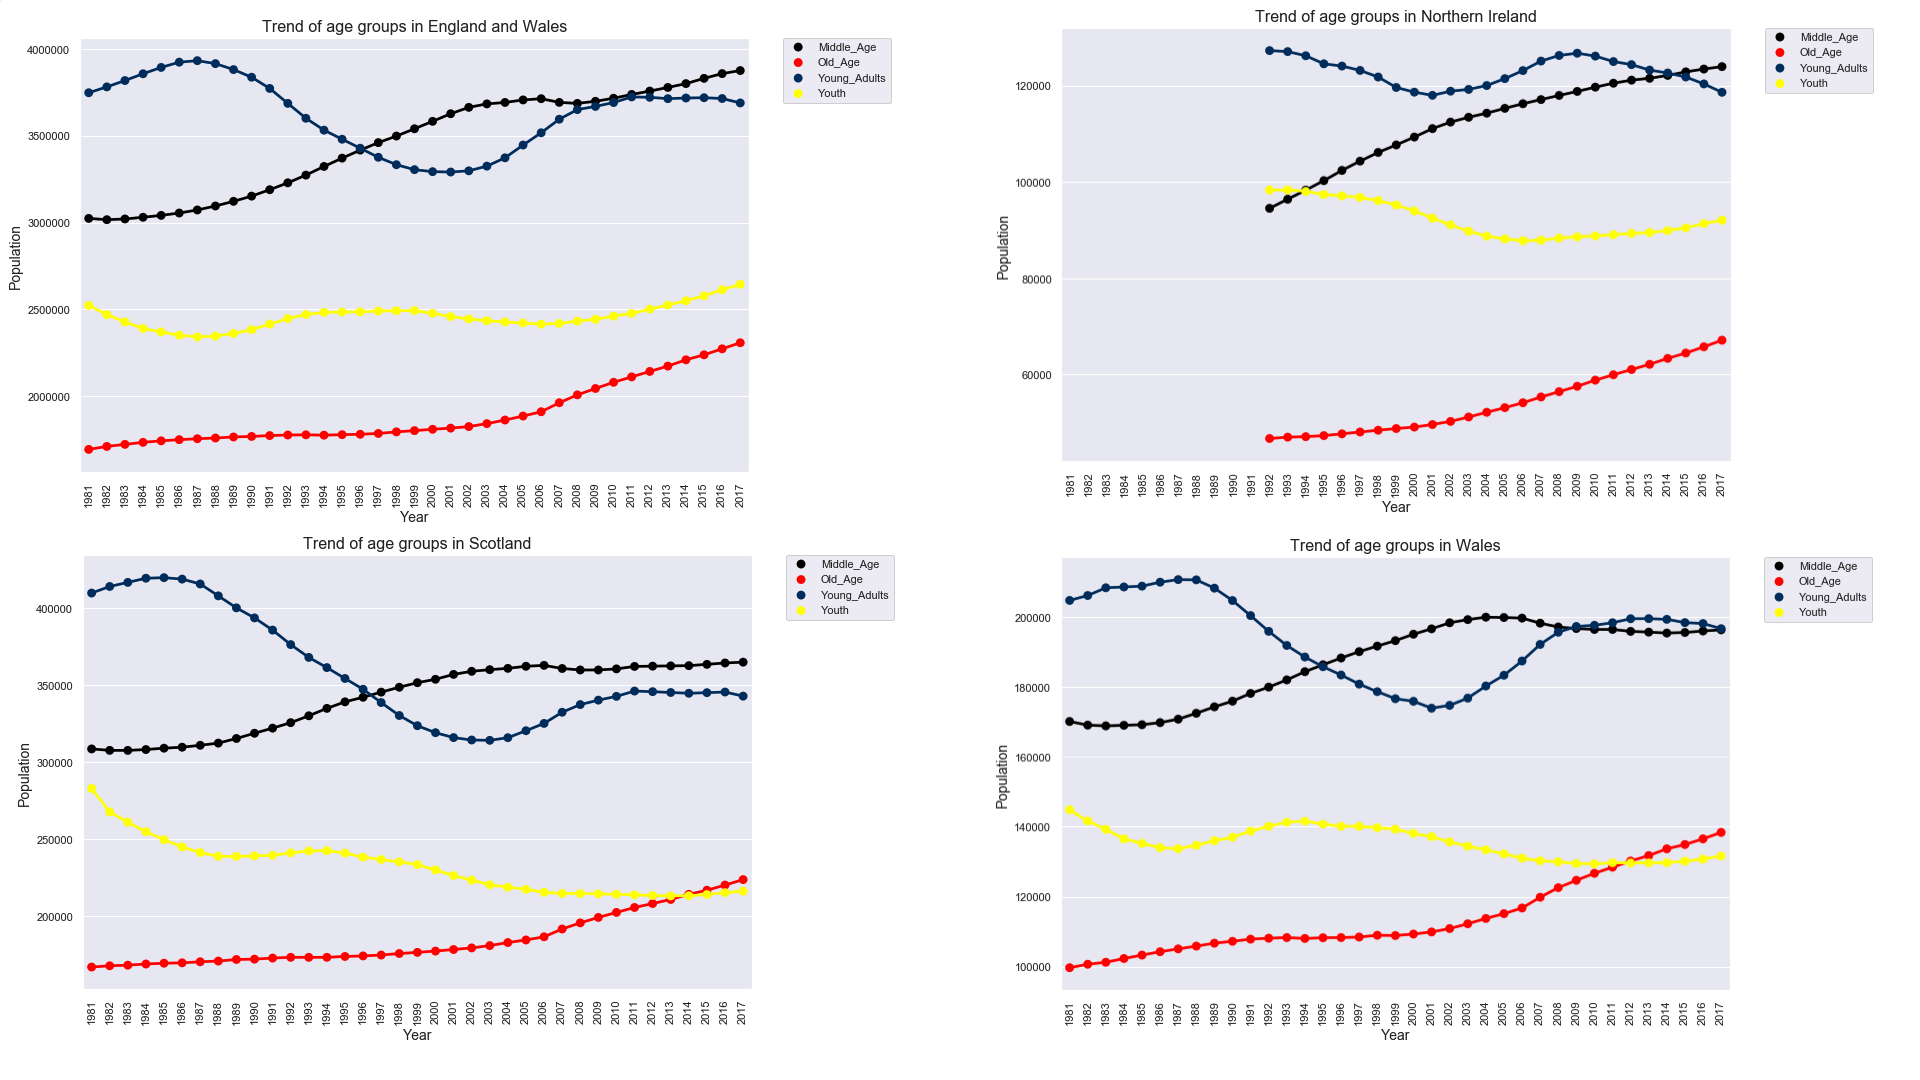

In [26]:
Image(path + 'agetrends.png')

#### Conclusion: Looking at the graphs that show us the trend of the four different age groups, it can be seen that the lifespan of the UK population is increasing. This could be due to the changes in life style as well as better medical care. The graph also shows that the there is a similar ratio between the young adults and middle aged group, except for in Wales.
#### Northern Ireland only start recording their population in 1992

##### All population

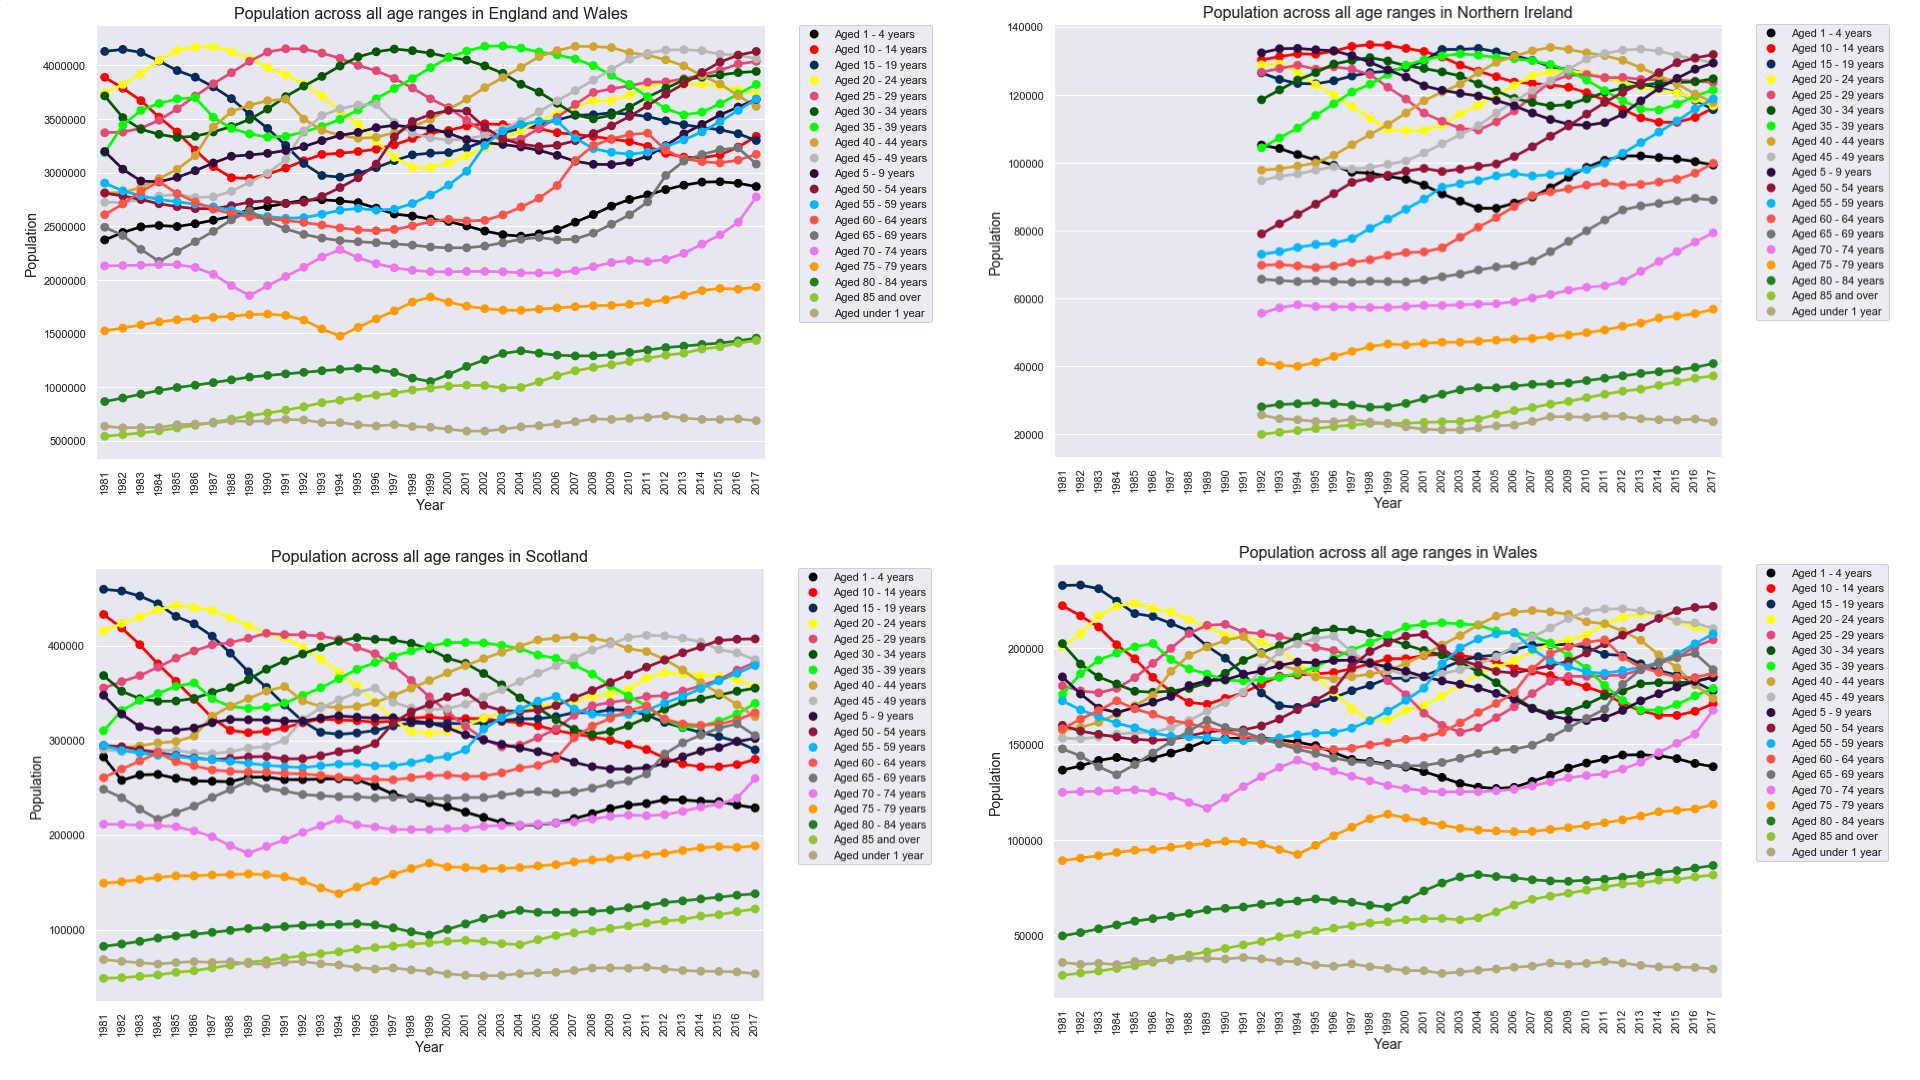

In [27]:
Image(path + 'allpop.png')

#### Conclusion: The dominant age groups in all 4 regions is between 50-54. This falls under the middle age group, which was seen to be the dominant one in the first set of graphs.
#### The birth rates across all regions is pretty constant with tiny fluctuations.

##### Young Adults

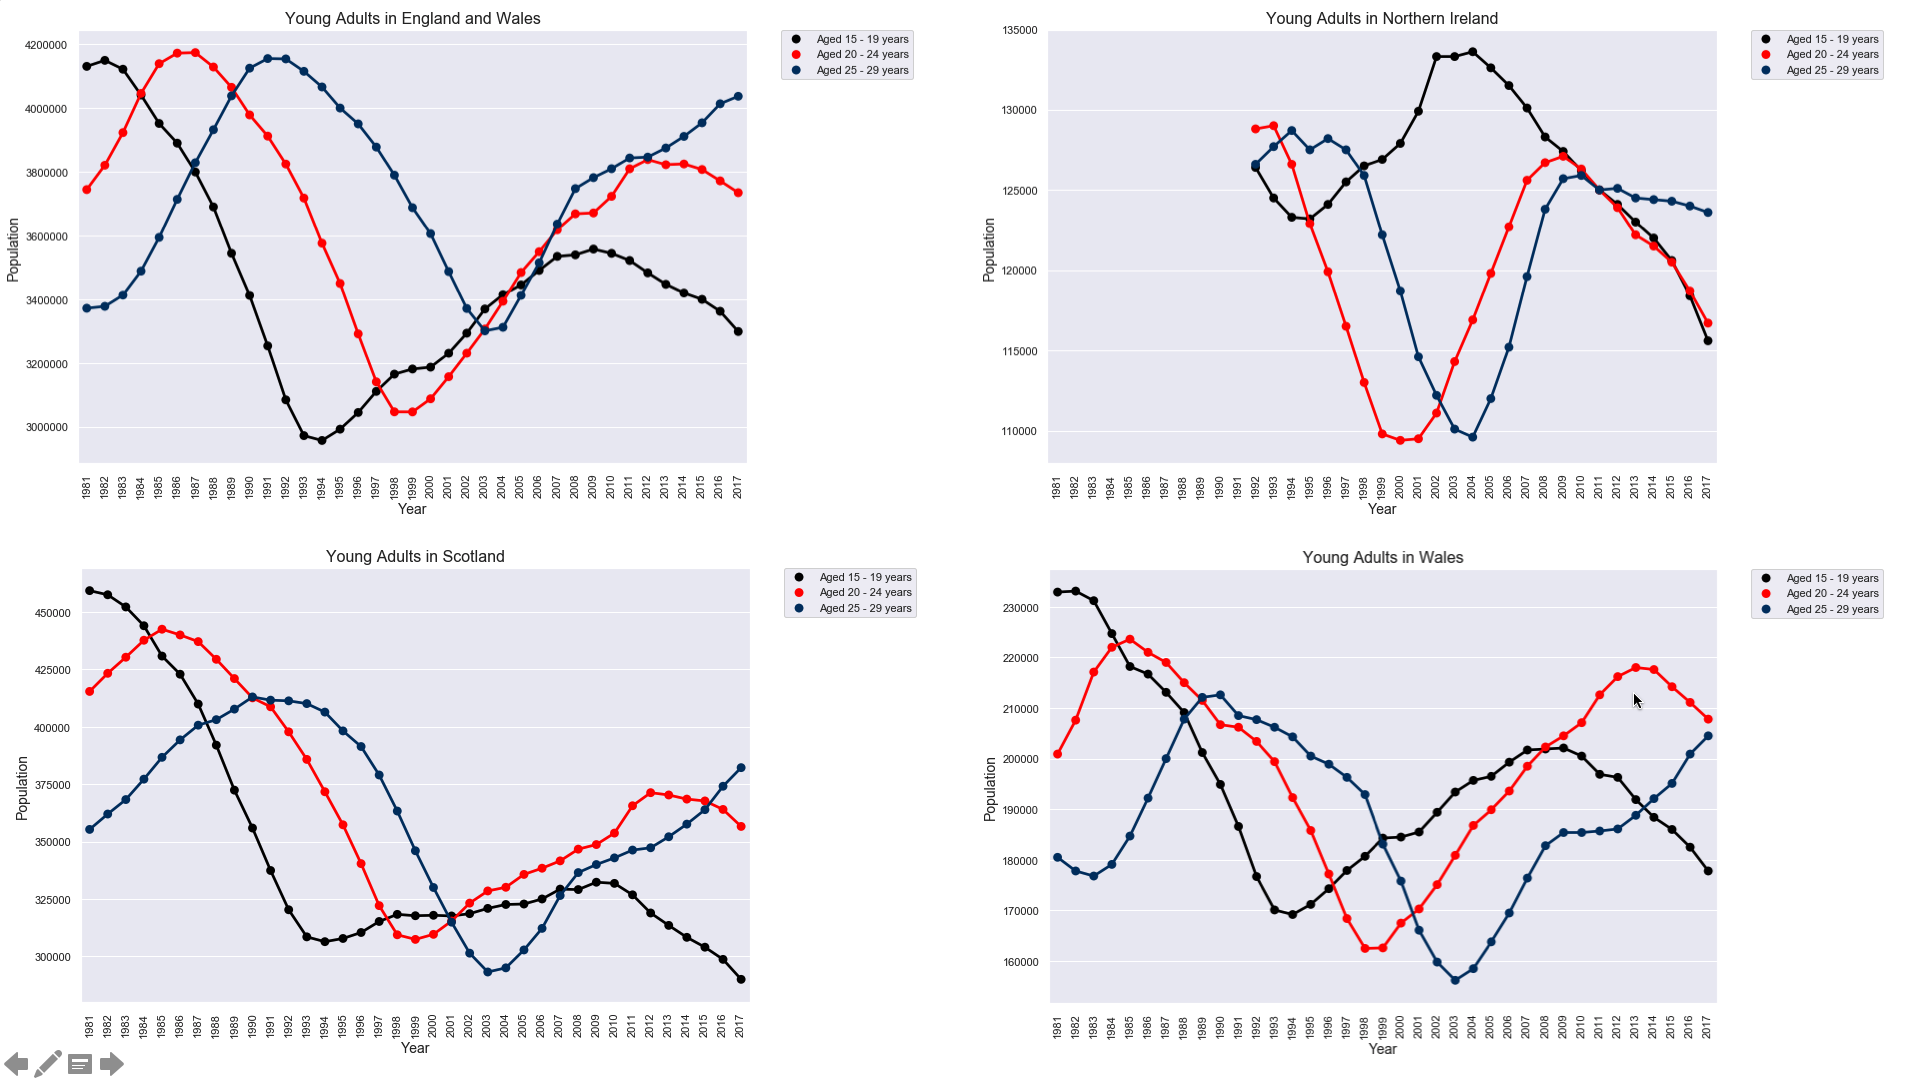

In [28]:
Image(path + 'yngadt.png')

#### Conclusion: It can be seen how an age group moved into the next age bracket and their respective population
#### The initial young generation (aged 15-19) in Scotland and Wales has decreased over the years. Consequently, the same generation has increased in England.
#### Although the records in Northern Ireland started much later, from 2003-2005 their 15-19 age range was much larger than the other 2 age brackets. However, even though the other two started to increase, all 3 age groups population were declining post 2009.
#### Looking at the set of graphs above and the four graphs before this one, it can be seen that the birth rate is pretty constant across all 4 regions in the dataset .Add this to the fact that the in some regions the 15-19 generation is decreasing, it can be concluded that they have moved on elsewhere; for example, the generation from 3 of the regions moving to England.

## 2.6 Further Statistical Analysis

### Looking at year 2017, total population in each age group (youth, young, middle, old) and comparing with total population (found in part 1) and seeing what % of each age group is part of total population

In [29]:
regions = [wales, scotland, nire, engWal]

In [30]:
# Create empty list
ages_2017 = []

# Loop through regions and obtain the population for each age group. Append this to the list above
for region in regions:
    reg = region[region['date'] == '2017'].groupby(['geography','age_group'])['Value'].sum()
    ages_2017.append(reg)

In [31]:
frame = pd.DataFrame(ages_2017)
frame = frame.T
frame = frame.reset_index()

# Get rid of nan values as each region had its count in a separate oclumn
frame['Value'] = frame.sum(axis = 1)
# frame = frame [['geography', 'age_group', 'Value']]

# Pivot table so it matches the table obtained in part 1
frame = frame.pivot_table('Value', ['geography'], 'age_group')
frame = frame.reset_index()
frame['Total'] = frame.sum(axis = 1)
frame

age_group,geography,Middle_Age,Old_Age,Young_Adults,Youth,Total
0,England and Wales,23257200.0,13843700.0,11068700.0,10575100.0,58744700.0
1,Northern Ireland,743700.0,402900.0,355900.0,368400.0,1870900.0
2,Scotland,2190200.0,1341600.0,1028800.0,864300.0,5424900.0
3,Wales,1178100.0,830300.0,590100.0,526600.0,3125100.0


###### Add up all the values to get the total for all regions

In [32]:
youthsum = frame['Youth'].sum() # total females
youngadultsum = frame['Young_Adults'].sum() # total females
middlesum = frame['Middle_Age'].sum() # total females
oldsum = frame['Old_Age'].sum() # total males
totalsum = frame['Total'].sum() # total population

# Add the above information to the table above
frame = frame.append({'geography': 'United Kingdom (Total)', 'Middle_Age': middlesum, 'Old_Age': oldsum, 'Young_Adults': youngadultsum, 'Youth': youthsum , 'Total': totalsum}, ignore_index = True)
frame

age_group,geography,Middle_Age,Old_Age,Young_Adults,Youth,Total
0,England and Wales,23257200.0,13843700.0,11068700.0,10575100.0,58744700.0
1,Northern Ireland,743700.0,402900.0,355900.0,368400.0,1870900.0
2,Scotland,2190200.0,1341600.0,1028800.0,864300.0,5424900.0
3,Wales,1178100.0,830300.0,590100.0,526600.0,3125100.0
4,United Kingdom (Total),27369200.0,16418500.0,13043500.0,12334400.0,69165600.0


###### Calculate % of total population of each group in each region (for the year 2017) and drop numeric fields

In [33]:
frame['Youth_%'] = (frame['Youth']/frame['Total']) * 100
frame['Young_Adults_%'] = (frame['Young_Adults']/frame['Total']) * 100
frame['Middle_Age_%'] = (frame['Middle_Age']/frame['Total']) * 100
frame['Old_Age_%'] = (frame['Old_Age']/frame['Total']) * 100
frame = frame[['geography', 'Youth_%', 'Young_Adults_%', 'Middle_Age_%', 'Old_Age_%']]
frame

age_group,geography,Youth_%,Young_Adults_%,Middle_Age_%,Old_Age_%
0,England and Wales,18.001794,18.842040,39.590295,23.565871
1,Northern Ireland,19.691058,19.022930,39.750922,21.535090
2,Scotland,15.932091,18.964405,40.373094,24.730410
3,Wales,16.850661,18.882596,37.697994,26.568750
4,United Kingdom (Total),17.833142,18.858363,39.570538,23.737956


#### df_total_pop from part 1

In [34]:
df_total_pop

sex,date,geography,Female,Male,Total
0,2017,England and Wales,29723300,29021300,58744600
1,2017,Northern Ireland,950600,920200,1870800
2,2017,Scotland,2784500,2640300,5424800
3,2017,Wales,1585000,1540200,3125200
4,2017,United Kingdom (Total),35043400,34122000,69165400


###### Merge the 2 DFs above

In [35]:
stats_df = df_total_pop.merge(frame, on = 'geography', how = 'outer')
stats_df

,date,geography,Female,Male,Total,Youth_%,Young_Adults_%,Middle_Age_%,Old_Age_%
0,2017,England and Wales,29723300,29021300,58744600,18.001794,18.842040,39.590295,23.565871
1,2017,Northern Ireland,950600,920200,1870800,19.691058,19.022930,39.750922,21.535090
2,2017,Scotland,2784500,2640300,5424800,15.932091,18.964405,40.373094,24.730410
3,2017,Wales,1585000,1540200,3125200,16.850661,18.882596,37.697994,26.568750
4,2017,United Kingdom (Total),35043400,34122000,69165400,17.833142,18.858363,39.570538,23.737956


#### Conclusion: The percentage of each age group across all 4 regions is pretty even. There is, however, a big gap between young adults and the middle age group across all 4 regions. Roughly a quarter of the population is in the old age group, which is significantly greater than young adults. 
#### The table confirms what the graphs above showed, the majority of the population (~40%), lies in the middle age group.

###### Male/Female comparison
###### Job postings/markets. Job opportunities
###### Schooling? Universities?
###### Eng & Wales - Wales = England ONLY